<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%203%20-%20Lesson%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2020-11-24 09:40:01--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.5.240, 172.217.7.240, 172.217.13.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.5.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.03s   

2020-11-24 09:40:01 (186 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [8]:
import numpy as np

import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt

## Parameters

In [9]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

## Load Data

In [12]:
def load_data(path, training_size):
  with open(path, 'r') as f:
      datastore = json.load(f)


  sentences = []
  labels = []
  urls = []
  for item in datastore:
      sentences.append(item['headline'])
      labels.append(item['is_sarcastic'])

  training_sentences = sentences[0:training_size]
  testing_sentences = sentences[training_size:]
  training_labels = labels[0:training_size]
  testing_labels = labels[training_size:]

  return (training_sentences, training_labels), (testing_sentences, testing_labels)

In [14]:
(training_sentences, training_labels), (testing_sentences, testing_labels) = load_data(path="/tmp/sarcasm.json", training_size=training_size)

## Tokenize Data

In [15]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [16]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

## Model

In [17]:
model_convd1d = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_convd1d.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_convd1d.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           16000     
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          10368     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 24)                3096      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 29,489
Trainable params: 29,489
Non-trainable params: 0
_________________________________________________________________


In [18]:
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                12544     
_________________________________________________________________
dense_2 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 30,129
Trainable params: 30,129
Non-trainable params: 0
_________________________________________________________________


## Training

In [19]:
num_epochs=50

In [20]:

history_lstm = model_lstm.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)


Epoch 1/50
625/625 [==============================] - 9s 15ms/step - loss: 0.4535 - accuracy: 0.7680 - val_loss: 0.3858 - val_accuracy: 0.8241
Epoch 2/50
625/625 [==============================] - 9s 14ms/step - loss: 0.3574 - accuracy: 0.8370 - val_loss: 0.3794 - val_accuracy: 0.8267
Epoch 3/50
625/625 [==============================] - 9s 14ms/step - loss: 0.3307 - accuracy: 0.8497 - val_loss: 0.3789 - val_accuracy: 0.8290
Epoch 4/50
625/625 [==============================] - 9s 14ms/step - loss: 0.3156 - accuracy: 0.8590 - val_loss: 0.3756 - val_accuracy: 0.8274
Epoch 5/50
625/625 [==============================] - 9s 14ms/step - loss: 0.3034 - accuracy: 0.8655 - val_loss: 0.3722 - val_accuracy: 0.8314
Epoch 6/50
625/625 [==============================] - 9s 14ms/step - loss: 0.2958 - accuracy: 0.8706 - val_loss: 0.3792 - val_accuracy: 0.8308
Epoch 7/50
625/625 [==============================] - 9s 14ms/step - loss: 0.2872 - accuracy: 0.8724 - val_loss: 0.3758 - val_accuracy: 0.8322

In [21]:
history_conv1d = model_convd1d.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)


Epoch 1/50
625/625 [==============================] - 3s 4ms/step - loss: 0.4653 - accuracy: 0.7686 - val_loss: 0.4055 - val_accuracy: 0.8144
Epoch 2/50
625/625 [==============================] - 3s 4ms/step - loss: 0.3571 - accuracy: 0.8411 - val_loss: 0.3975 - val_accuracy: 0.8207
Epoch 3/50
625/625 [==============================] - 2s 4ms/step - loss: 0.3185 - accuracy: 0.8592 - val_loss: 0.4127 - val_accuracy: 0.8173
Epoch 4/50
625/625 [==============================] - 2s 4ms/step - loss: 0.2867 - accuracy: 0.8777 - val_loss: 0.3971 - val_accuracy: 0.8235
Epoch 5/50
625/625 [==============================] - 3s 4ms/step - loss: 0.2502 - accuracy: 0.8933 - val_loss: 0.4265 - val_accuracy: 0.8162
Epoch 6/50
625/625 [==============================] - 3s 4ms/step - loss: 0.2182 - accuracy: 0.9101 - val_loss: 0.4638 - val_accuracy: 0.8113
Epoch 7/50
625/625 [==============================] - 2s 4ms/step - loss: 0.1848 - accuracy: 0.9276 - val_loss: 0.5168 - val_accuracy: 0.8086
Epoch 

## Results

In [23]:

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()


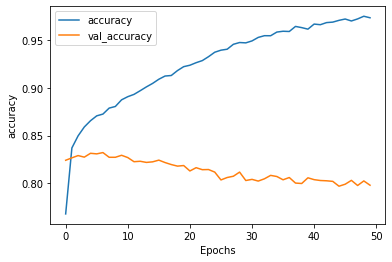

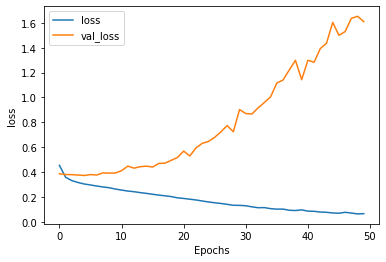

In [24]:
plot_graphs(history_lstm, 'accuracy')
plot_graphs(history_lstm, 'loss')

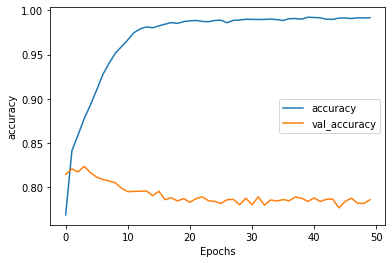

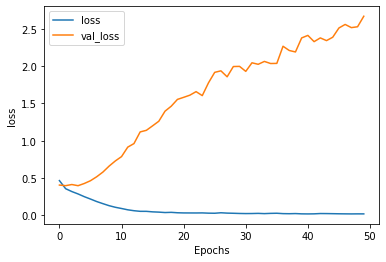

In [25]:
plot_graphs(history_conv1d, 'accuracy')
plot_graphs(history_conv1d, 'loss')

In [27]:
model_lstm.save("test_lstm.h5")
model_convd1d.save("test_conv1d.h5")